In [12]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 

%matplotlib inline



In [13]:
from scipy.cluster.vq import whiten, kmeans2

In [14]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '565e86deead5487d8c8bb3ff7e9bab89' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [15]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')


[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [16]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')    
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            lenth_name = len(team['name']) 
            
        else:
            0
    print('Team "{}", {} players, {} name len'.format(team['name'], len(players), lenth_name))
    time.sleep(20)#тайминг запроса с сайта 19 секунд
    team['players'] = players
    team['lenth_name'] = lenth_name

Team "FC Rio Ave", 30 players, 10 name len
Team "FC Porto", 20 players, 8 name len
Team "Moreirense FC", 28 players, 13 name len
Team "FC Paços de Ferreira", 30 players, 20 name len
Team "Sporting CP", 25 players, 11 name len
Team "Maritimo Funchal", 30 players, 16 name len
Team "CD Tondela", 26 players, 10 name len
Team "SL Benfica", 25 players, 10 name len
Team "Boavista Porto FC", 29 players, 17 name len
Team "FC Arouca", 27 players, 9 name len
Team "Vitoria Setubal", 26 players, 15 name len
Team "C.F. Os Belenenses", 25 players, 18 name len
Team "Vitoria Guimaraes", 24 players, 17 name len
Team "Sporting Braga", 27 players, 14 name len
Team "GD Estoril Praia", 28 players, 16 name len
Team "Feirense", 0 players, 8 name len
Team "Nacional Funchal", 27 players, 16 name len
Team "G.D. Chaves", 0 players, 11 name len


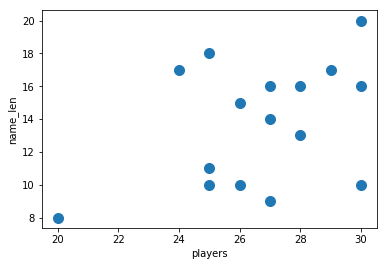

In [47]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'], 'players': len(team['players']), 'name_len': team['lenth_name']})
teams_pd = pd.DataFrame(team_for_pd)


In [48]:
del teams_pd['name']


,name_len,players
0,10,30
1,8,20
2,13,28
3,20,30
4,11,25
5,16,30
6,10,26
7,10,25
8,17,29
9,9,27


In [51]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[  2.82138246,  11.79891951],
       [  2.25710597,   7.86594634],
       [  3.6677972 ,  11.01232487],
       [  5.64276493,  11.79891951],
       [  3.10352071,   9.83243292],
       [  4.51421194,  11.79891951],
       [  2.82138246,  10.22573024],
       [  2.82138246,   9.83243292],
       [  4.79635019,  11.40562219],
       [  2.53924422,  10.61902756],
       [  4.2320737 ,  10.22573024],
       [  5.07848843,   9.83243292],
       [  4.79635019,   9.4391356 ],
       [  3.94993545,  10.61902756],
       [  4.51421194,  11.01232487],
       [  4.51421194,  10.61902756]])

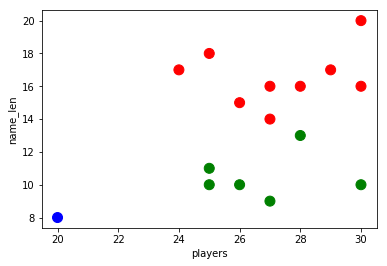

In [57]:
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='players', y='name_len', c=colors, s=100)

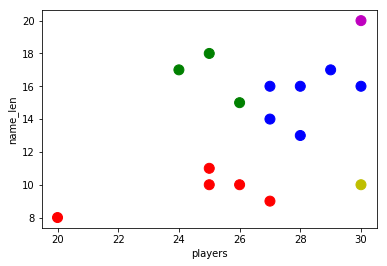

In [58]:
centroids, cluster_map = kmeans2(whitened, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='players', y='name_len', c=colors, s=100)